In [3]:
import pandas as pd
from datetime import datetime
import numpy as np
from numba import njit
from tqdm import tqdm


import plotly.graph_objects as go
import plotly.express as px
import typing as tp
import vectorbt as vbt

In [4]:
df = pd.DataFrame(vbt.YFData.download('BTC-USD').get('Close'))
df = df[df.index>'2020-01-01']

In [19]:
length = len(df)
df['entries'] = np.random.rand(length) < 0.2   # Randomly 15% of rows True\
# df['entries'] = True
df['entries'].value_counts()

entries
False    1404
True      341
Name: count, dtype: int64

In [21]:
pf = vbt.Portfolio.from_signals(
        
        close = df.Close,  # Ceny zamknięcia
        entries = df['entries'],  # Sygnały wejścia
        # exits = False,  # Sygnały wyjścia
        # sl_stop = SL,  # StopLoss w postaci procentowej
        # sl_trail= True,
        
        size = 1, 
        init_cash = 1000000,
        fees=0.002, 
        accumulate=False, 
        upon_long_conflict='Ignore', 
        upon_opposite_entry='Close', 
        max_orders=1000  
             
    )
tot_ret = np.round(pf.total_return(), 2)
print(f"RET:{tot_ret}, Trades:{ pf.stats()[11:12].values[0]}")

RET:0.06, Trades:1


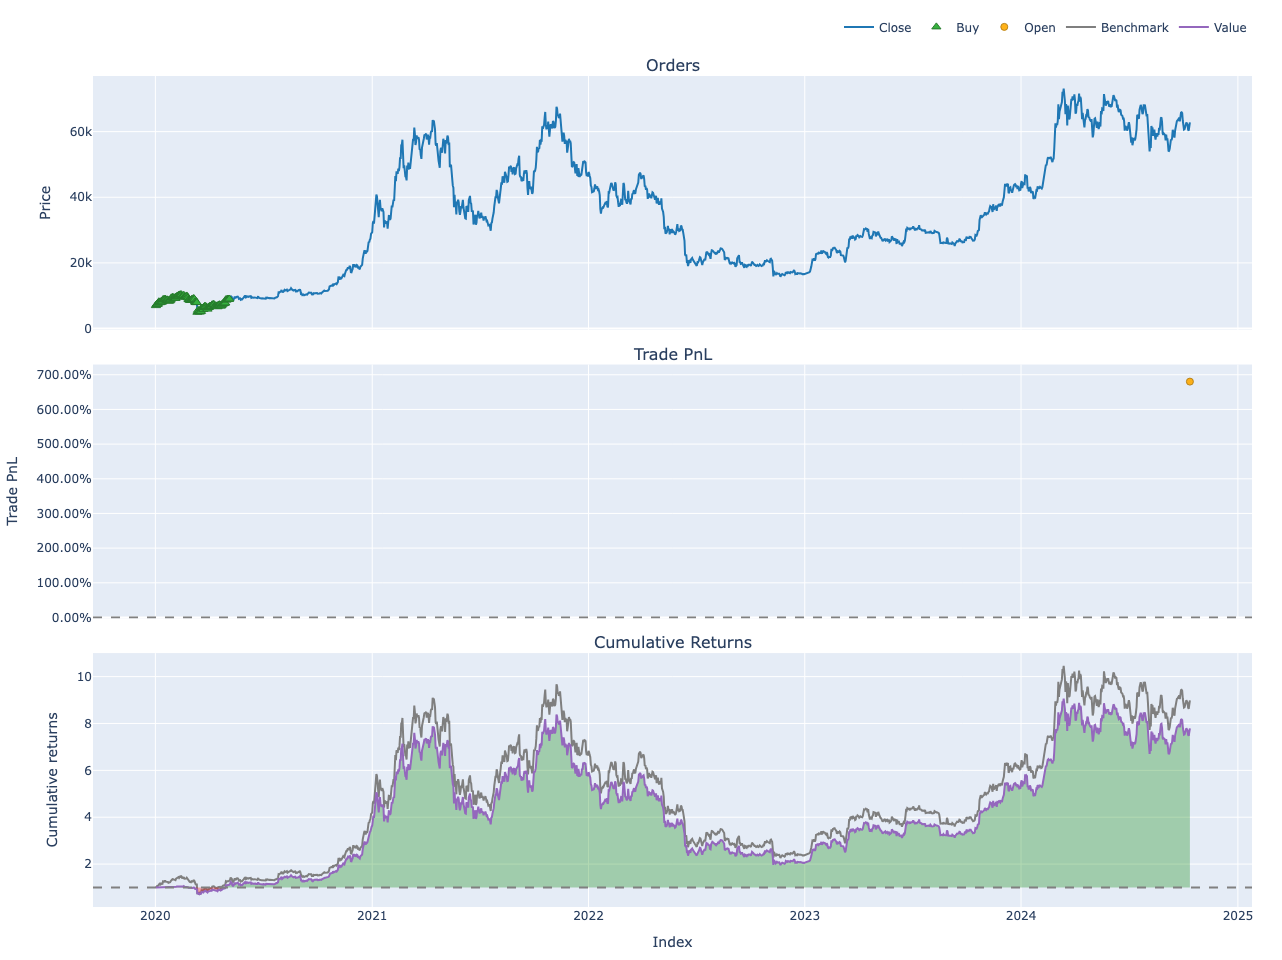

Start                         2020-01-02 00:00:00+00:00
End                           2024-10-12 00:00:00+00:00
Period                                             1745
Start Value                                   1000000.0
End Value                                 7789104.28956
Total Return [%]                             678.910429
Benchmark Return [%]                         798.869228
Max Gross Exposure [%]                            100.0
Total Fees Paid                             1996.007984
Max Drawdown [%]                              76.634564
Max Drawdown Duration                             846.0
Total Trades                                          1
Total Closed Trades                                   0
Total Open Trades                                     1
Open Trade PnL                            6789104.28956
Win Rate [%]                                        NaN
Best Trade [%]                                      NaN
Worst Trade [%]                                 

/opt/miniconda3/envs/RAJ/lib/python3.12/site-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sharpe_ratio' requires frequency to be set

/opt/miniconda3/envs/RAJ/lib/python3.12/site-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'calmar_ratio' requires frequency to be set

/opt/miniconda3/envs/RAJ/lib/python3.12/site-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'omega_ratio' requires frequency to be set

/opt/miniconda3/envs/RAJ/lib/python3.12/site-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sortino_ratio' requires frequency to be set



In [11]:
# Wizualizacja wyników
pf.plot().show()

# Wyświetlenie podsumowania wyników
print(pf.stats())


In [12]:
print(pf.orders.records_readable)

     Order Id  Column                 Timestamp      Size        Price  \
0           0       0 2020-01-02 00:00:00+00:00  1.000000  6985.470215   
1           1       0 2020-01-03 00:00:00+00:00  1.000000  7344.884277   
2           2       0 2020-01-04 00:00:00+00:00  1.000000  7410.656738   
3           3       0 2020-01-05 00:00:00+00:00  1.000000  7411.317383   
4           4       0 2020-01-06 00:00:00+00:00  1.000000  7769.219238   
..        ...     ...                       ...       ...          ...   
120       120       0 2020-05-01 00:00:00+00:00  1.000000  8864.766602   
121       121       0 2020-05-02 00:00:00+00:00  1.000000  8988.596680   
122       122       0 2020-05-03 00:00:00+00:00  1.000000  8897.468750   
123       123       0 2020-05-04 00:00:00+00:00  1.000000  8912.654297   
124       124       0 2020-05-05 00:00:00+00:00  0.049598  9003.070312   

          Fees Side  
0    13.970940  Buy  
1    14.689769  Buy  
2    14.821313  Buy  
3    14.822635  Buy  
4